# Decision Trees with Python

### Import the library

In [42]:
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
print ("Done !")

Done !


### Load the training data

In [120]:
train_df = pd.read_csv("el4233-2018-2019-02-klasifikasi-train.csv")
print(train_df.shape)
train_df.head()

(1000, 4)


,No,X0,X1,Y
0,0,0.684314,1.102777,0
1,1,0.218752,0.122695,1
2,2,0.034522,0.329218,1
3,3,-0.323019,1.479858,0
4,4,2.303018,-0.369103,1


<h2 id="preprocessing">Data Preprocessing</h2>

Lets define X, and y for our dataset:

In [121]:
X = np.asarray(train_df[['X0', 'X1']])
X[0:5]

array([[ 0.68431364,  1.10277693],
       [ 0.21875218,  0.12269542],
       [ 0.03452151,  0.32921753],
       [-0.3230186 ,  1.47985821],
       [ 2.30301774, -0.36910267]])

In [122]:
y = np.asarray(train_df['Y'])
y [0:5]

array([0, 1, 1, 0, 1])

Normalization dataset

In [123]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.05770671,  0.92112645],
       [-0.5143087 , -0.58774391],
       [-0.74066502, -0.26979576],
       [-1.17995924,  1.50165649],
       [ 2.04653906, -1.34488455]])

## Train/Test dataset

Okay, we split our dataset into train and test set:

In [262]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.1, random_state=5)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (900, 2) (900,)
Test set: (100, 2) (100,)


<h2 id="modeling">Modeling</h2>

We will first create an instance of the <b>DecisionTreeClassifier</b> called <b>drugTree</b>.<br>
    Inside of the classifier, specify <i> criterion="entropy" </i> so we can see the information gain of each node.

In [311]:
from sklearn import tree
from sklearn.model_selection import cross_val_score

depth = []
for i in range(3,20):
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth = i)
    # Perform 7-fold cross validation 
    scores = cross_val_score(estimator=clf, X=X, y=y, cv=7, n_jobs=4)
    depth.append((i,scores.mean()))
print(depth)

[(3, 0.8570302936500119), (4, 0.9530188121737417), (5, 0.9590268886043535), (6, 0.9580278876053523), (7, 0.9550308846083494), (8, 0.9590268886043535), (9, 0.9600258896033544), (10, 0.9590268886043533), (11, 0.9590268886043535), (12, 0.9600258896033544), (13, 0.9590268886043533), (14, 0.9590268886043535), (15, 0.9590268886043535), (16, 0.9600258896033544), (17, 0.9590268886043533), (18, 0.9590268886043533), (19, 0.9580278876053523)]


In [312]:
drugTree = DecisionTreeClassifier(criterion='entropy', max_depth = 13)
drugTree # it shows the default parameters

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=13,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Next, we will fit the data with the training feature matrix <b> X </b> and training  response vector <b> y </b>

In [313]:
drugTree.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=13,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

<hr>

<div id="prediction">
    <h2>Prediction</h2>
    Let's make some <b>predictions</b> on the testing dataset and store it into a variable called <b>predTree</b>.
</div>

In [314]:
predTree = drugTree.predict(X_test)

You can print out <b>predTree</b> and <b>y_testset</b> if you want to visually compare the prediction to the actual values.

In [315]:
print (predTree [0:5])
print (y_test [0:5])

[0 0 0 1 1]
[0 0 0 1 1]


<h2 id="evaluation">Evaluation</h2>

Next, let's import <b>metrics</b> from sklearn and check the accuracy of our model.

In [316]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("Decision Trees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

Decision Trees's Accuracy:  1.0


<hr>

<div id="visualization">
    <h2>Visualization</h2>
    Lets visualize the tree
</div>

In [317]:
# Notice: You might need to uncomment and install the pydotplus and graphviz libraries if you have not installed these before
# !conda install -c conda-forge pydotplus -y
# !conda install -c conda-forge python-graphviz -y

In [318]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

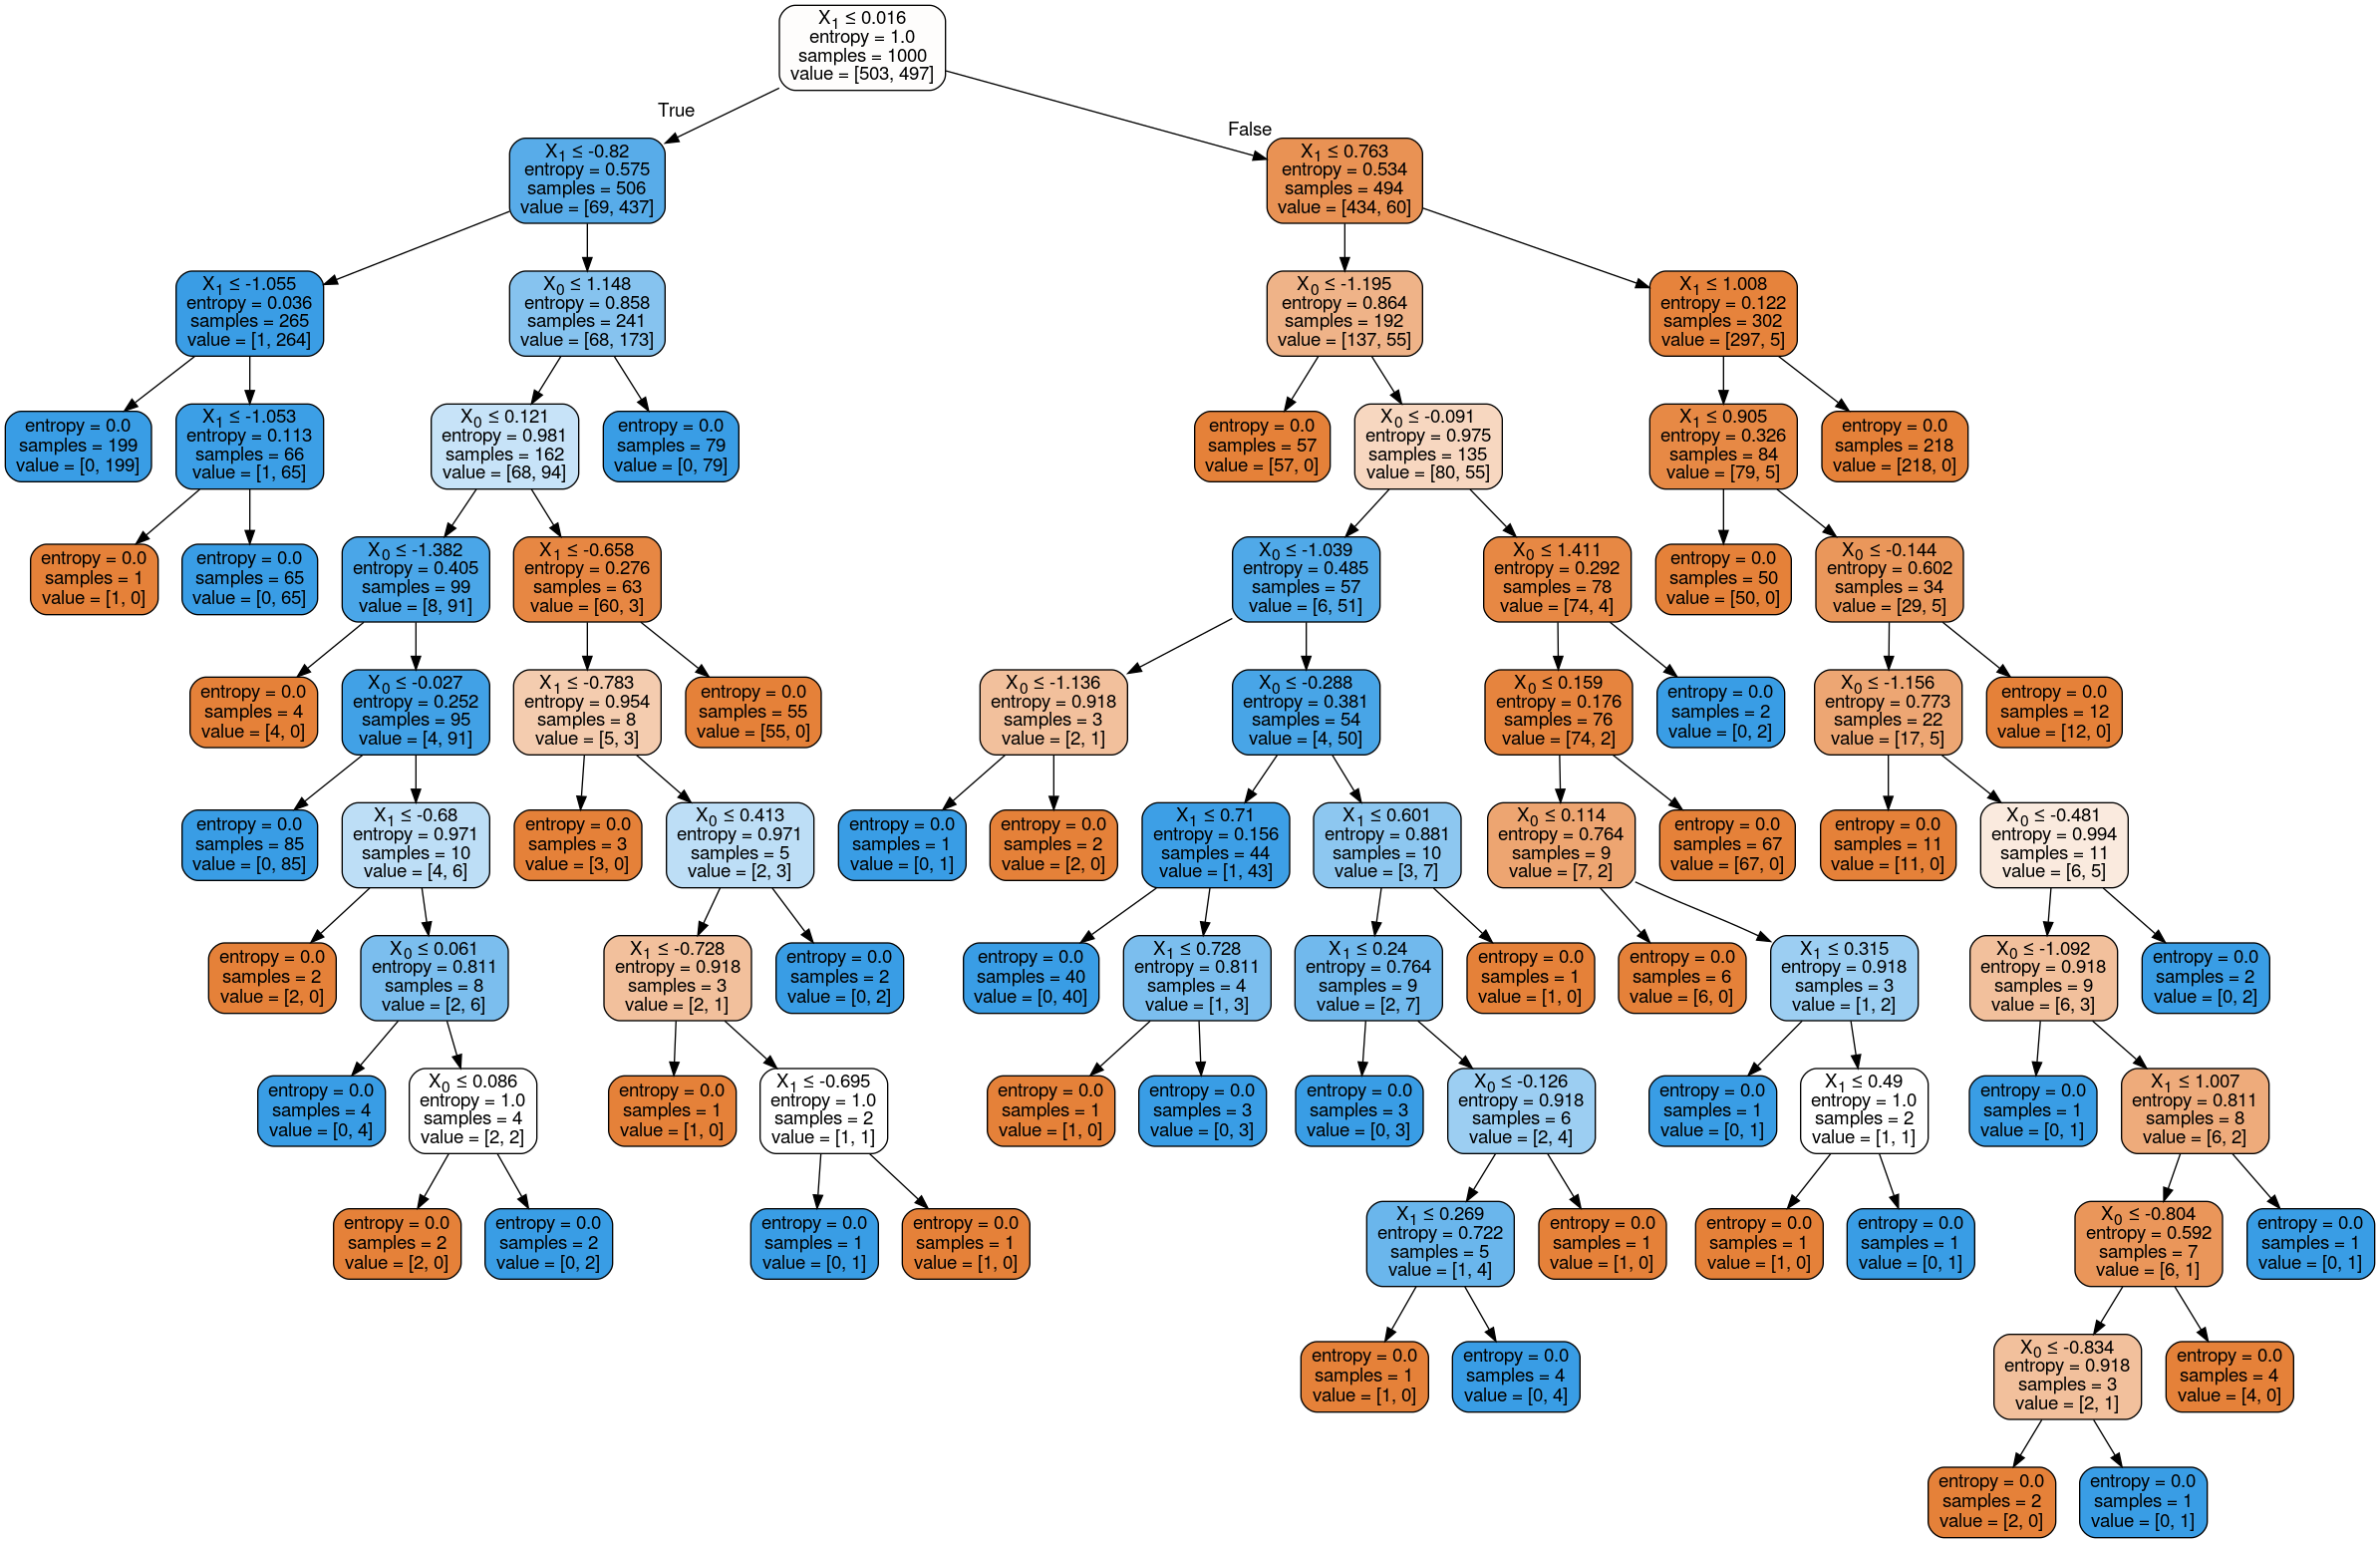

In [319]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(drugTree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

### Now, we can predict on our test set:

In [330]:
test_df = pd.read_csv("el4233-2018-2019-02-klasifikasi-test.csv")
print(test_df.shape)
test_df.head()

(1000, 3)


,No,X0,X1
0,1000,1.030522,0.892364
1,1001,1.318739,-0.498590
2,1002,1.210100,0.498914
3,1003,-0.644977,1.346281
4,1004,0.042483,0.550473


In [331]:
X_testing = np.asarray(test_df[['X0', 'X1']])
X_testing

array([[ 1.03052186,  0.89236409],
       [ 1.31873875, -0.49858951],
       [ 1.21010012,  0.49891417],
       ...,
       [ 1.29764444, -0.19043612],
       [ 0.2258945 ,  1.11699123],
       [ 0.03178638,  1.65716399]])

In [332]:
from sklearn import preprocessing
X_testing = preprocessing.StandardScaler().fit(X_testing).transform(X_testing)
X_testing[0:5]

array([[ 0.46263846,  0.61040714],
       [ 0.81928198, -1.53597188],
       [ 0.68485105,  0.00327499],
       [-1.61064644,  1.31084592],
       [-0.75997385,  0.08283525]])

In [333]:
y_testing = drugTree.predict(X_testing)

In [334]:
test_df['prediksi'] = y_testing
test_df = test_df.set_index('No')
test_df.head()

,X0,X1,prediksi
No,,,
1000,1.030522,0.892364,0
1001,1.318739,-0.498590,1
1002,1.210100,0.498914,0
1003,-0.644977,1.346281,0
1004,0.042483,0.550473,1


In [335]:
test_df.to_csv('el4233-2018-2019-02-klasifikasi-submit-Decision_Trees.csv')

references :
[cognitiveclass.ai](https://cognitiveclass.ai)